In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [4]:
test = ImageDataGenerator(rescale=1/255)


train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
                                  
train_dataset = train_datagen.flow_from_directory("COVID-CT-master/Dataset/train/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("COVID-CT-master/Dataset/test/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

val_dataset = test.flow_from_directory("COVID-CT-master/Dataset/val/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 425 images belonging to 2 classes.
Found 203 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [5]:
test_dataset.class_indices

{'COVID': 0, 'NonCOVID': 1}

In [6]:

model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-02-07 11:18:43.249249: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-07 11:18:43.249908: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:

#steps_per_epoch = train_imagesize/batch_size

model.fit(train_dataset,
         epochs = 10,
         validation_data = val_dataset
       
         )

Epoch 1/10


2023-02-07 11:18:49.368534: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-07 11:18:49.631781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - ETA: 0s - loss: 0.7072 - accuracy: 0.5459

2023-02-07 11:18:54.022068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 5s 225ms/step - loss: 0.7072 - accuracy: 0.5459 - val_loss: 0.7006 - val_accuracy: 0.4915
Epoch 2/10
14/14 [==============================] - 2s 170ms/step - loss: 0.6782 - accuracy: 0.5506 - val_loss: 0.7801 - val_accuracy: 0.4915
Epoch 3/10
14/14 [==============================] - 2s 170ms/step - loss: 0.6502 - accuracy: 0.5859 - val_loss: 0.7753 - val_accuracy: 0.4915
Epoch 4/10
14/14 [==============================] - 3s 188ms/step - loss: 0.6399 - accuracy: 0.6212 - val_loss: 0.7775 - val_accuracy: 0.4661
Epoch 5/10
14/14 [==============================] - 2s 170ms/step - loss: 0.6424 - accuracy: 0.6071 - val_loss: 0.7662 - val_accuracy: 0.4831
Epoch 6/10
14/14 [==============================] - 2s 163ms/step - loss: 0.6369 - accuracy: 0.5859 - val_loss: 0.7606 - val_accuracy: 0.4831
Epoch 7/10
14/14 [==============================] - 2s 169ms/step - loss: 0.6248 - accuracy: 0.6165 - val_loss: 0.8106 - val_accuracy: 0.5085
Epoch 8/10
14/14 

In [9]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("NonCovid",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("Covid",fontsize=30)


2023-02-07 11:21:27.900411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 527ms/step
[[5.8679727e-26]]
1/1 [==============================] - 0s 15ms/step
[[1.5659434e-30]]
1/1 [==============================] - 0s 13ms/step
[[1.]]


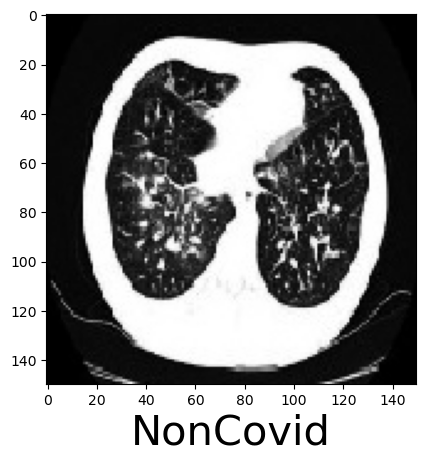

In [10]:
predictImage("COVID-CT-master/Dataset/test/NonCOVID/0.jpg")
predictImage("COVID-CT-master/Dataset/test/COVID/2020.03.12.20034686-p17-91-1.png")
predictImage("COVID-CT-master/Dataset/test/NonCOVID/4%3.jpg")

In [11]:
#Calcing the accuracy of the model
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc)

7/7 [==============================] - 1s 80ms/step - loss: 0.6950 - accuracy: 0.5271
Test accuracy: 0.5270935893058777
